In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers-segmentation/Mall_Customers.csv


In [2]:
# Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/kaggle/input/mall-customers-segmentation/Mall_Customers.csv')

In [4]:
# first few rows
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# check the null values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Drop the Columns
df.drop('CustomerID', axis=1, inplace=True)



In [7]:
# Encoding the Column(Genre)
df['Genre'] = df['Genre'].map({'Male':1,'Female':0})
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [8]:
#  feature scaler
X = df[['Genre','Age','Annual Income (k$)','Spending Score (1-100)']]

sclar = StandardScaler()
x_scaler = sclar.fit_transform(X)

In [9]:
# Elbow method using for Optimal K 

#wcss= []
#for i in range(1,11):
#    kmeans= KMeans(n_clusters=i,init='random',random_state=0)
#    kmeans.fit(x_scaler)
#    wcss.append(kmeans.inertia_)

#plt.figure(figsize=(8,4))
#plt.plot(range(1,11),wcss,marker='o')
#plt.title('Elbow Method for Optimal K')
#plt.xlabel('No.of Clusters')
#plt.ylabel('Wcss')
#plt.show()

In [10]:
# Applying KMeans Clustirng
km = KMeans(n_clusters=4,random_state=0)
df['Clusters'] = km.fit_predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


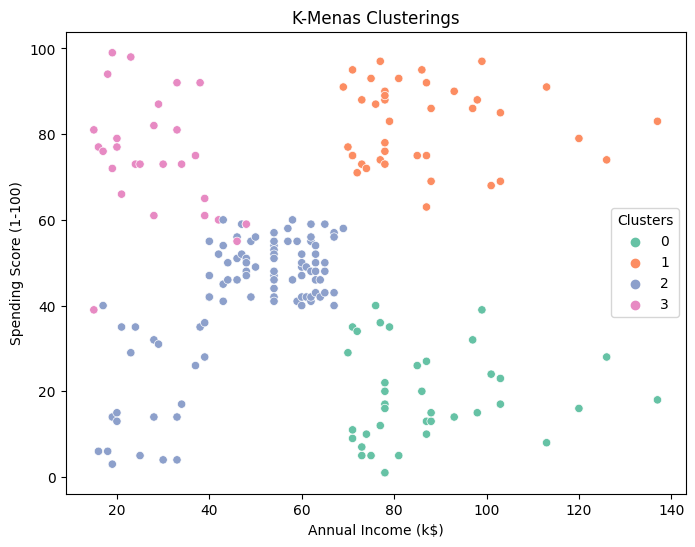

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', hue='Clusters',data=df,palette='Set2')
plt.title('K-Menas Clusterings')
plt.show()

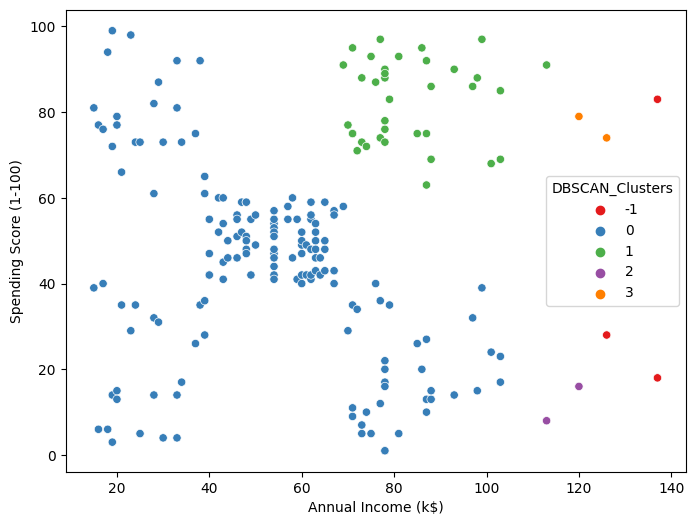

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x = df[['Annual Income (k$)','Spending Score (1-100)']]
#x.head()
scaler = StandardScaler()
x_scalerd = scaler.fit_transform(x)

db = DBSCAN(eps=0.5, min_samples=2)
df['DBSCAN_Clusters']=db.fit_predict(x_scalerd)


# visuals
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)', hue='DBSCAN_Clusters', palette='Set1')
plt.show()